## ANALYSIS OF FOOD PRODUCTION AND SUPPLY IN AFRICA BY OLUWATOMISIN AROKODARE 

## PROJECT OVERVIEW
>Food production and supply play an important role in providing nutrition and promoting economic growth in Africa.Food security includes the availability, usability, stability, and affordability of food for both people and communities.Human well-being, societal stability, poverty reduction, and sustainable development all rely on food security.

>In this project, I will be analyzing two different datasets namely food production and food supply datasets.The dataset was sourced from Food and Agriculture Organization of United Nations website.The two datasets have information about food production and food supply in 45 African countries between (2004 - 2013) respectively.The Population and Country code dataset was sourced from Kaggle.

## Dataset Features 
**Food Production Dataset:**

**1.**Country: The name of the country.

**2.**Item: The name of the produce from each country.
 
**3.**Year: The year of production.

**4.**Value: The quantity of each item, measured in kilotonnes (kt).

**Food Supply Dataset:**

**1.**Country: The name of the country.

**2.**Year: The year of supply.

**3.**Value: The quantity supplied, measured in kilocalories per person per day (kcal/person/day).

 
## PROJECT GOAL
>The goal of of this project is to analyze these datasets, and gain insights on African food shortage problems, and producing visuals that can help in making appropriate decisions and ensuring food security in Africa.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patheffects
import folium
import geopandas as gpd
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

%matplotlib inline
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

C:\Users\aroko\AppData\Local\Temp\ipykernel_14748\4270348101.py:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



### DATA GATHERING- FOOD PRODUCTION DATASET


In [2]:
# loading the food production dataset into a pandas dataframe
af_prod= pd.read_csv('Africa Food Production (2004 - 2013).csv')
af_prod

Country                Item  Year  Value
0       Algeria  Wheat and products  2004   2731
1       Algeria  Wheat and products  2005   2415
2       Algeria  Wheat and products  2006   2688
3       Algeria  Wheat and products  2007   2319
4       Algeria  Wheat and products  2008   1111
...         ...                 ...   ...    ...
23105  Zimbabwe         Crustaceans  2009      0
23106  Zimbabwe         Crustaceans  2010      0
23107  Zimbabwe         Crustaceans  2011      0
23108  Zimbabwe         Crustaceans  2012      0
23109  Zimbabwe         Crustaceans  2013      0

[23110 rows x 4 columns]

## ASSESSING THE DATASET

In [3]:
### Checking information about foodproduction dataset 
af_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [4]:
### Checking the data types of the columns
af_prod.dtypes

Country    object
Item       object
Year        int64
Value       int64
dtype: object

In [5]:
### Statistical description of food production dataset
af_prod.describe()

Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000

In [6]:
### checking for missing values in the dataframe
af_prod.isnull().sum()

Country    0
Item       0
Year       0
Value      0
dtype: int64

In [7]:
### checking the number of unique values in each food production columns
af_prod.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

>**OBSERVATION:**There are 45 countries, 94 Food Items and Ten(10) Years in the Food Production Data.

In [8]:
### checking for duplicated rows in the datafarame
af_prod.duplicated().sum()

0

### DATA CLEANING

In [9]:
af_prod.head(5)

Country                Item  Year  Value
0  Algeria  Wheat and products  2004   2731
1  Algeria  Wheat and products  2005   2415
2  Algeria  Wheat and products  2006   2688
3  Algeria  Wheat and products  2007   2319
4  Algeria  Wheat and products  2008   1111

In [10]:
### creating a unit column containing the symbol of kilotone, which is the unit of the numbers in the Value column
af_prod['Unit'] = 'kt'

In [11]:
af_prod.head(10)

Country                Item  Year  Value Unit
0  Algeria  Wheat and products  2004   2731   kt
1  Algeria  Wheat and products  2005   2415   kt
2  Algeria  Wheat and products  2006   2688   kt
3  Algeria  Wheat and products  2007   2319   kt
4  Algeria  Wheat and products  2008   1111   kt
5  Algeria  Wheat and products  2009   2953   kt
6  Algeria  Wheat and products  2010   2605   kt
7  Algeria  Wheat and products  2011   2555   kt
8  Algeria  Wheat and products  2012   3432   kt
9  Algeria  Wheat and products  2013   3299   kt

In [12]:
### converting the Year column to datetime
af_prod['Year'] = pd.to_datetime(af_prod['Year'], format="%Y").dt.year

In [13]:
### Groupby Country and year and show the total value for each product for different years
af_prod_1 = af_prod.groupby(['Country', 'Year'])
af_prod_1.first()

Item  Value Unit
Country  Year                                
Algeria  2004  Wheat and products   2731   kt
         2005  Wheat and products   2415   kt
         2006  Wheat and products   2688   kt
         2007  Wheat and products   2319   kt
         2008  Wheat and products   1111   kt
...                           ...    ...  ...
Zimbabwe 2009  Wheat and products     12   kt
         2010  Wheat and products     18   kt
         2011  Wheat and products     23   kt
         2012  Wheat and products     20   kt
         2013  Wheat and products     25   kt

[450 rows x 3 columns]

In [14]:
### Initialize the Total sum of Food produced by each year by (Grouping by Country, Year and Values).
af_prod.groupby(['Country','Year'])['Value'].sum()

Country   Year
Algeria   2004    15536
          2005    15667
          2006    16417
          2007    14763
          2008    13841
                  ...  
Zimbabwe  2009     5754
          2010     6777
          2011     7551
          2012     8173
          2013     7914
Name: Value, Length: 450, dtype: int64

### DATA GATHERING- FOOD SUPPLY DATASET

In [15]:
# loading the food supply dataset into a pandas dataframe
af_supply = pd.read_csv('Africa Food Supply (2004 - 2013).csv')
af_supply

Country  Year  Value
0     Algeria  2004   2987
1     Algeria  2005   2958
2     Algeria  2006   3047
3     Algeria  2007   3041
4     Algeria  2008   3048
..        ...   ...    ...
445  Zimbabwe  2009   2147
446  Zimbabwe  2010   2168
447  Zimbabwe  2011   2200
448  Zimbabwe  2012   2197
449  Zimbabwe  2013   2110

[450 rows x 3 columns]

## ASSESSING THE DATASET

In [16]:
### Checking information about food supply dataset 
af_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [17]:
### Checking the data types of the columns
af_supply.dtypes

Country    object
Year        int64
Value       int64
dtype: object

In [18]:
### Statistical description of food supply dataset
af_supply.describe()

Year        Value
count   450.000000   450.000000
mean   2008.500000  2469.775556
std       2.875478   379.140143
min    2004.000000  1781.000000
25%    2006.000000  2174.000000
50%    2008.500000  2376.000000
75%    2011.000000  2681.750000
max    2013.000000  3561.000000

In [19]:
### checking for missing values in the dataframe
af_supply.isnull().sum()

Country    0
Year       0
Value      0
dtype: int64

In [20]:
### checking for duplicated rows in the datafarame
af_supply.duplicated().sum()

0

In [21]:
### checking the number of unique values in each food production columns
af_supply.nunique()

Country     45
Year        10
Value      373
dtype: int64

>**OBSERVATION:**There are 45 countries and Ten(10) Years in the Food Supply Data.

### DATA CLEANING

In [22]:
af_supply.head(5)

Country  Year  Value
0  Algeria  2004   2987
1  Algeria  2005   2958
2  Algeria  2006   3047
3  Algeria  2007   3041
4  Algeria  2008   3048

In [23]:
###Creating a unit column containing the symbol of kilotone, which is the unit of the numbers in the Value column
af_supply['Unit'] = 'kcal/person/day'

In [24]:
af_supply.head(10)

Country  Year  Value             Unit
0  Algeria  2004   2987  kcal/person/day
1  Algeria  2005   2958  kcal/person/day
2  Algeria  2006   3047  kcal/person/day
3  Algeria  2007   3041  kcal/person/day
4  Algeria  2008   3048  kcal/person/day
5  Algeria  2009   3110  kcal/person/day
6  Algeria  2010   3142  kcal/person/day
7  Algeria  2011   3217  kcal/person/day
8  Algeria  2012   3272  kcal/person/day
9  Algeria  2013   3296  kcal/person/day

In [25]:
### converting the Year column to datetime
af_supply['Year'] = pd.to_datetime(af_supply['Year'], format="%Y").dt.year

In [26]:
### Groupby Country and year and show the total value for each product for different years
af_supply_1 = af_supply.groupby(['Country', 'Year'])
af_supply_1.first()

Value             Unit
Country  Year                        
Algeria  2004   2987  kcal/person/day
         2005   2958  kcal/person/day
         2006   3047  kcal/person/day
         2007   3041  kcal/person/day
         2008   3048  kcal/person/day
...              ...              ...
Zimbabwe 2009   2147  kcal/person/day
         2010   2168  kcal/person/day
         2011   2200  kcal/person/day
         2012   2197  kcal/person/day
         2013   2110  kcal/person/day

[450 rows x 2 columns]

In [27]:
### Initialize the Total sum of Food supply by each year by (Grouping by Country, Year and Values).
af_supply.groupby(['Country','Year'])['Value'].sum()

Country   Year
Algeria   2004    2987
          2005    2958
          2006    3047
          2007    3041
          2008    3048
                  ... 
Zimbabwe  2009    2147
          2010    2168
          2011    2200
          2012    2197
          2013    2110
Name: Value, Length: 450, dtype: int64

#### EXPLANATORY ANALYSIS 

#### QUESTION 1.What is the Trend in food production over the years.

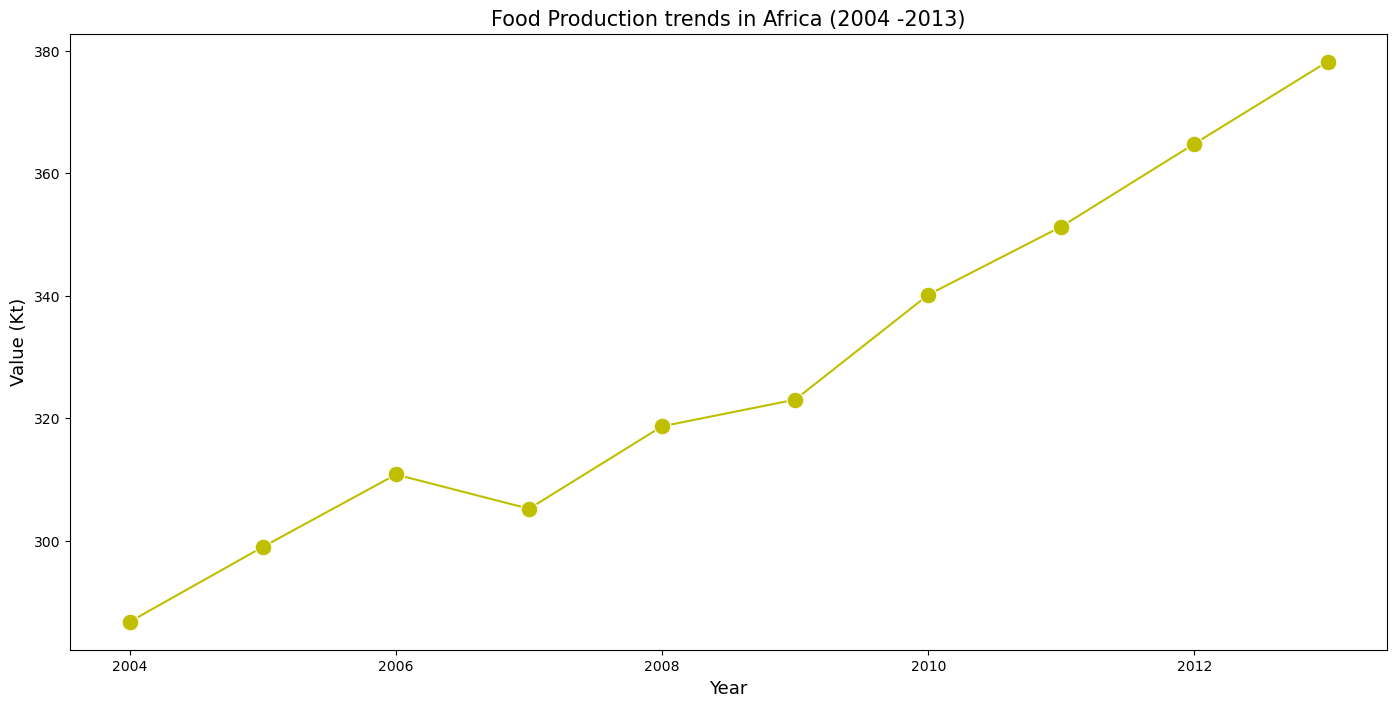

In [28]:
# visualizing trends in food production using line plot
plt.figure(figsize=[17,8])

sns.lineplot(data=af_prod, x="Year", y="Value", marker='o', markersize=12, ci=None, color='y')
plt.title("Food Production trends in Africa (2004 -2013)", fontsize=15);
plt.ylabel('Value (Kt)', fontsize=13);
plt.xlabel('Year', fontsize=13);
plt.show()


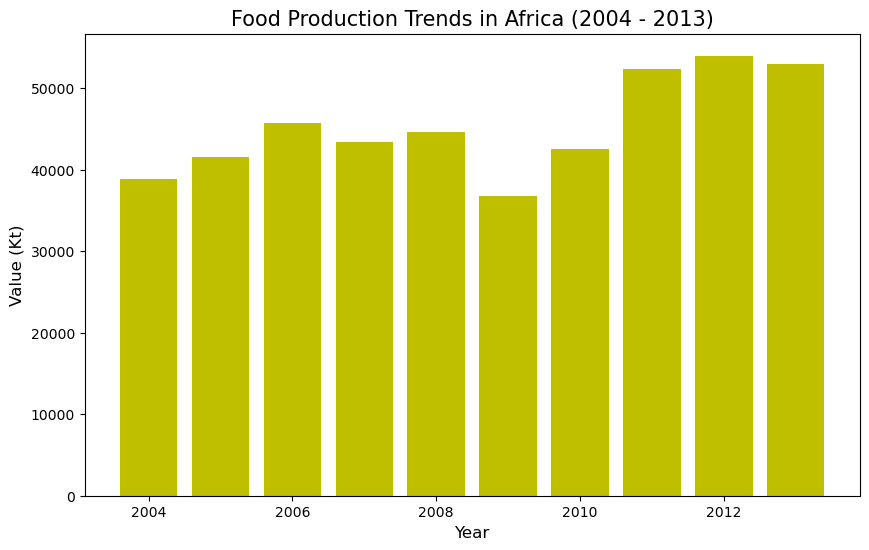

In [29]:
# visualizing trends in food production(2004-2013)
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(af_prod['Year'], af_prod['Value'], color='y')
ax.set_title('Food Production Trends in Africa (2004 - 2013)', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Value (Kt)', fontsize=12)

plt.show()

**Observation**: Food production in Africa increases yearly. However, apart from the drop in 2007, there was a progress increase in food production from 2008 to 2013.

### QUESTION 2. What is the Trend in food supply over the years?

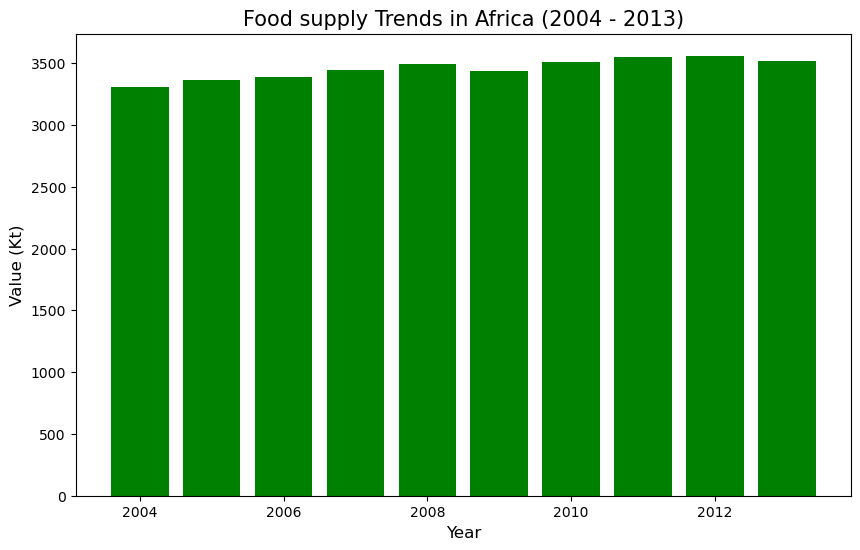

In [30]:
# visualizing trends in food supply(2004-2013)
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(af_supply['Year'], af_supply['Value'], color='g')
ax.set_title('Food supply Trends in Africa (2004 - 2013)', fontsize=15)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Value (Kt)', fontsize=12)

plt.show()

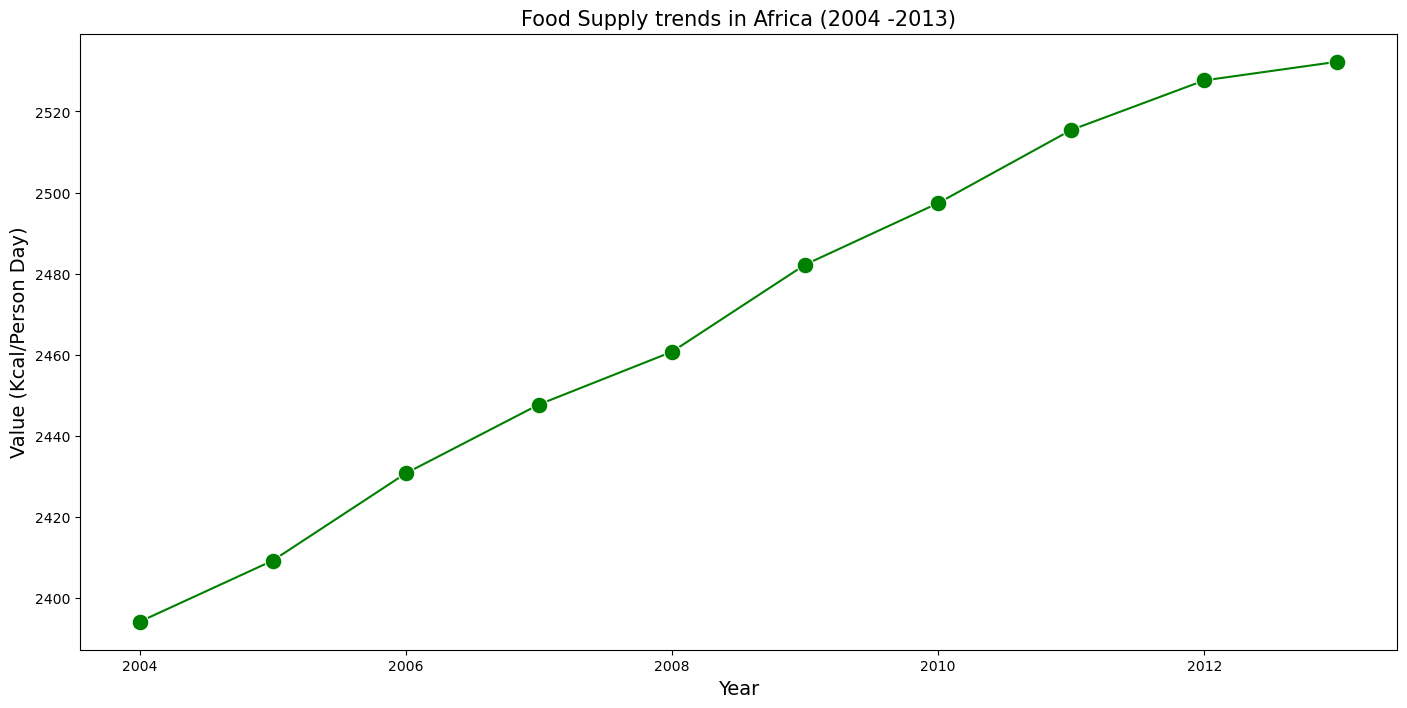

In [31]:
# Visualizing trends in food supply using line plot
plt.figure(figsize=[17,8])

sns.lineplot(data=af_supply, x="Year", y="Value", marker='o', markersize=12, ci=None, color='g')
plt.title("Food Supply trends in Africa (2004 -2013)", fontsize=15);
plt.ylabel('Value (Kcal/Person Day)', fontsize=14);
plt.xlabel('Year', fontsize=14);
plt.show()


**Observation**: There is progressive increase in food supply in African countries from 2004 to 2013.

### QUESTION 3. Which countries belong to theTop and Bottom 3 with the highest and Least volume of food production (2004-2013)?

In [32]:
# Statistics showing the top countries that produced food the most.
af_prod.groupby(['Country'])['Value'].sum().sort_values(ascending=False)

Country
Nigeria                        1628030
Egypt                           877498
South Africa                    579592
Ethiopia                        350693
United Republic of Tanzania     332802
Sudan                           301584
Ghana                           295004
Uganda                          278421
Morocco                         271821
Kenya                           256872
Cameroon                        197670
Angola                          195499
Algeria                         188650
Cote d'Ivoire                   182486
Mozambique                      157584
Malawi                          153717
Madagascar                      133071
Burkina Faso                    100129
Rwanda                           95174
Tunisia                          92713
Mali                             92292
Benin                            88072
Niger                            86808
Zambia                           82701
Zimbabwe                         73316
Guinea           

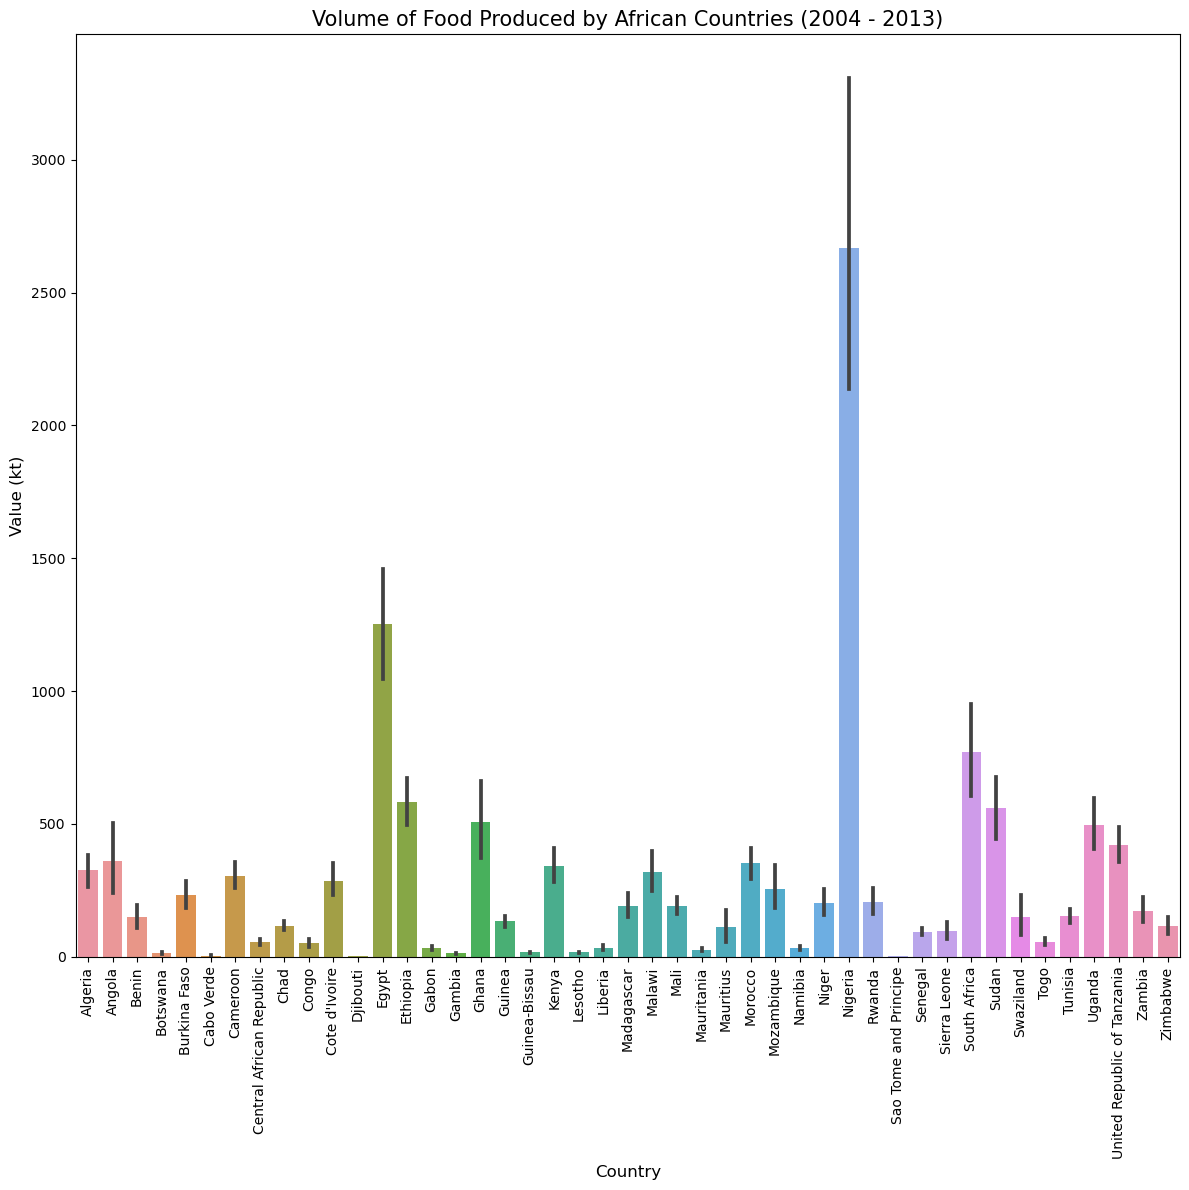

In [33]:
### Visualizing the Volume of food production per country(2004-2013)
plt.figure(figsize=[12,12])
fig = sns.barplot(data=af_prod,
                  x="Country",
                  y="Value")

fig.set_title('Volume of Food Produced by African Countries (2004 - 2013)', fontsize=15)
fig.set_xlabel('Country', fontsize=12)
fig.set_ylabel('Value (kt)', fontsize=12)

fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.tight_layout()

plt.show()

**Observation:**
**The TOP 3 African countries with the highest volume of food production within (2004-2013) are Nigeria, Egypt, & South Africa.**

**However,the BOTTOM 3 African countries Cabo Verde, Sao Tome & Principe and Djibouti produced the least volume of food.**

### QUESTION 4. Which Countries belong to the Top and Bottom 3 with the highest and Least volume of food Supply (2004-2013)?

In [34]:
# Statistics showing the top countries that produced food the most.
af_supply.groupby(['Country'])['Value'].sum().sort_values(ascending=False)

Country
Egypt                          34580
Tunisia                        33055
Morocco                        32967
Algeria                        31118
Mauritius                      30543
South Africa                   29629
Ghana                          29180
Cote d'Ivoire                  27666
Mali                           27502
Mauritania                     27443
Gabon                          27299
Nigeria                        26988
Burkina Faso                   26072
Gambia                         25695
Lesotho                        25588
Cabo Verde                     25514
Benin                          25378
Guinea                         25180
Niger                          25024
Cameroon                       24603
Sao Tome and Principe          24462
Djibouti                       24165
Senegal                        23784
Togo                           23339
Sudan                          23238
Swaziland                      23171
Guinea-Bissau                 

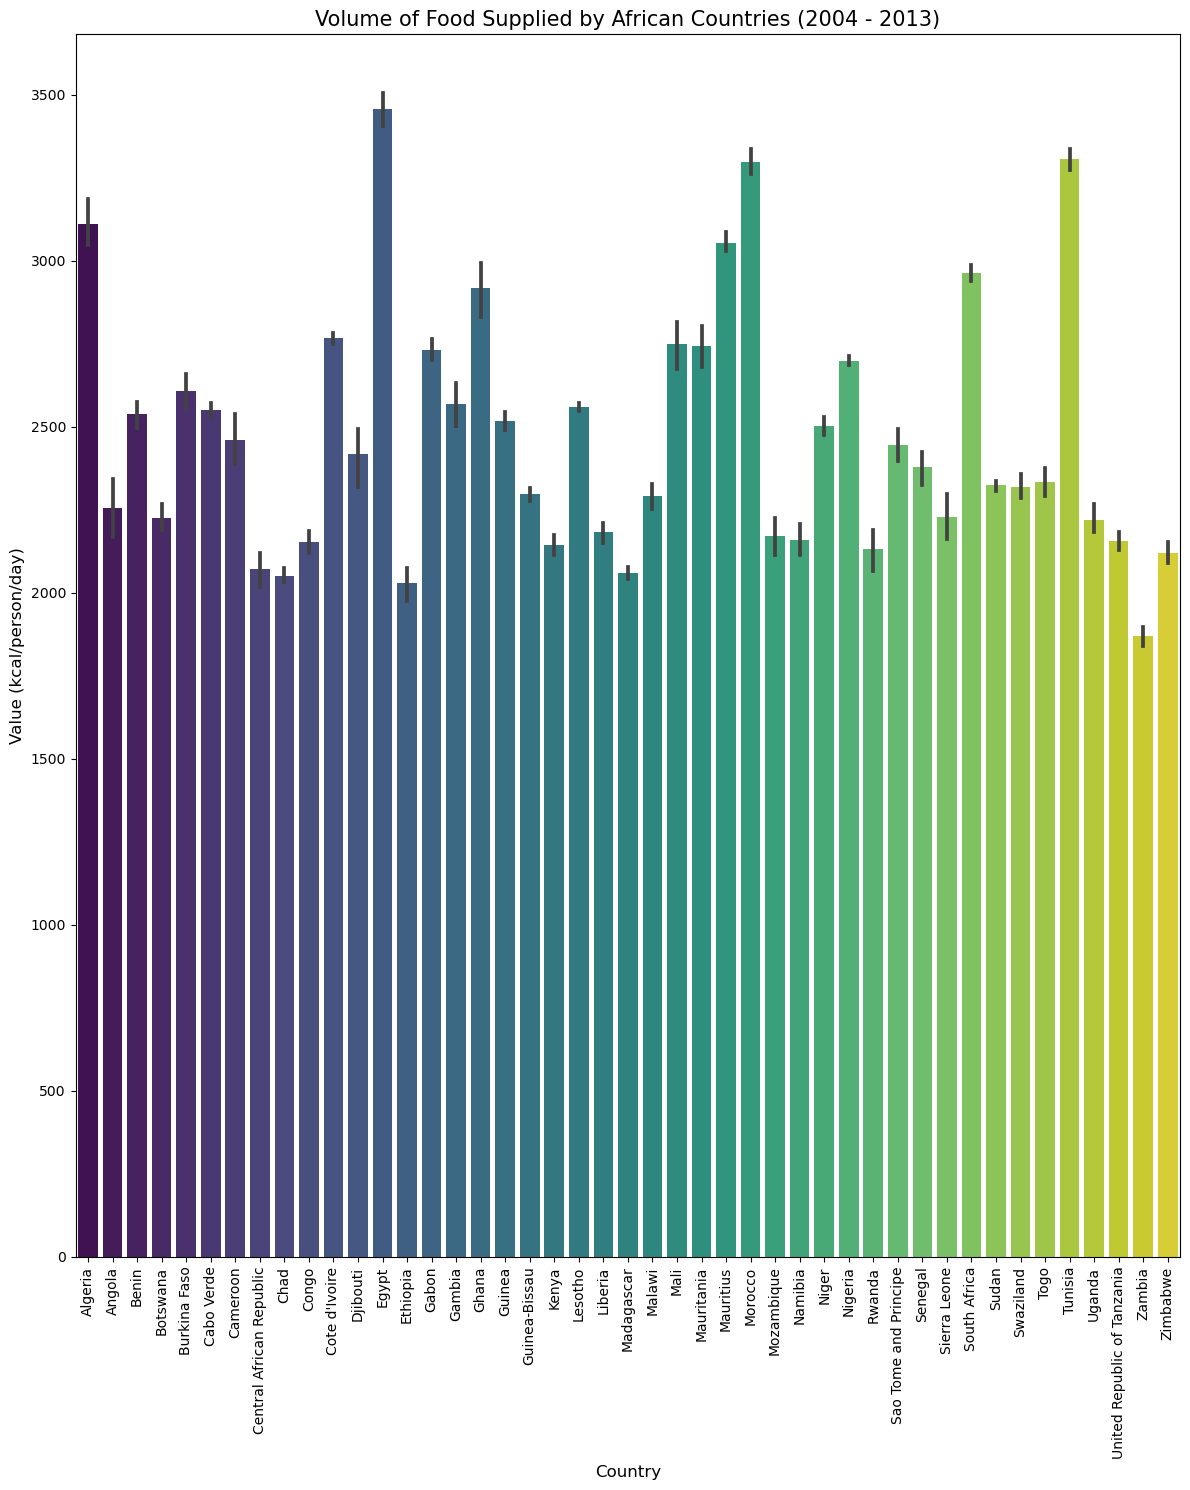

In [35]:
# Visualizing the volume of food supply per country(2004-2013)
plt.figure(figsize=[12,15])
fig = sns.barplot(data=af_supply,
                  x="Country",
                  y="Value",
                  palette="viridis")

fig.set_title('Volume of Food Supplied by African Countries (2004 - 2013)', fontsize=15)
fig.set_xlabel('Country', fontsize=12)
fig.set_ylabel('Value (kcal/person/day)', fontsize=12)

fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.tight_layout()

plt.show()

**Observation:**
**The TOP 3 African countries with the highest volume of food supply within (2004-2013) are Egypt, Tunisia, & Morocco**
**However,the BOTTOM 3 African countries Chad, Ethiopia and Zambia supplied the least volume of food.**

### QUESTION 5. What Food items was produced the most by African countries within (2004-2013)

In [36]:
# Dataframe for the most produced food items
mp_food = pd.DataFrame(af_prod.groupby('Item')['Value'].sum().sort_values(ascending = False)).reset_index()
mp_food

Item    Value
0      Cassava and products  1118948
1                Sugar cane   887008
2        Maize and products   574948
3                      Yams   511523
4         Vegetables, Other   410403
..                      ...      ...
89                   Cloves      249
90          Molluscs, Other      214
91                   Pepper      199
92          Fish, Liver Oil       28
93  Aquatic Animals, Others       13

[94 rows x 2 columns]

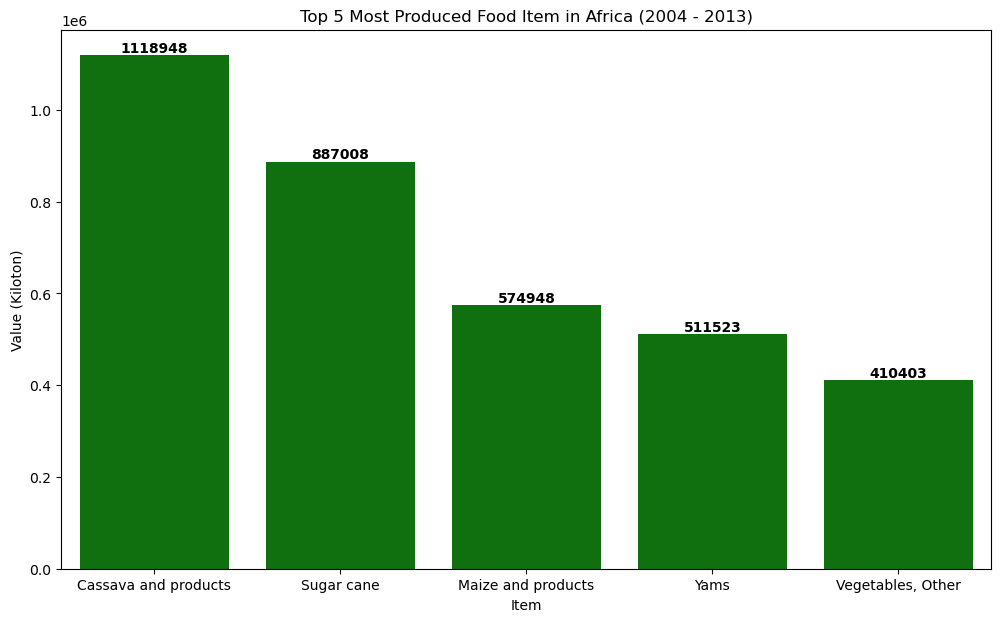

In [37]:
mp_food = pd.DataFrame(af_prod.groupby('Item')['Value'].sum().sort_values(ascending=False)).reset_index()[:5]
plt.figure(figsize=[12, 7])
ax = sns.barplot(y=mp_food.Value, x=mp_food.Item, data=mp_food, color='g')

for i, bar in enumerate(ax.patches):
    count = bar.get_height()

## Labeling each bar
    ax.annotate(f'{int(count)}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.gca().set_title("Top 5 Most Produced Food Item in Africa (2004 - 2013)")
plt.ylabel('Value (Kiloton)')
plt.xlabel('Item')

plt.show()



**Observation:**
**The Top 5 most produced food in Africa between 2004 and 2013 are Cassava, Sugar Cane, Maize and products, Yam, and Vegetables.

### QUESTION 6. What Food items was least produced the most by African countries within (2004-2013)?

In [38]:
# Dataframe for the most produced food items
mp_food = pd.DataFrame(af_prod.groupby('Item')['Value'].sum().sort_values(ascending = True)).reset_index()
mp_food

Item    Value
0   Aquatic Animals, Others       13
1           Fish, Liver Oil       28
2                    Pepper      199
3           Molluscs, Other      214
4                    Cloves      249
..                      ...      ...
89        Vegetables, Other   410403
90                     Yams   511523
91       Maize and products   574948
92               Sugar cane   887008
93     Cassava and products  1118948

[94 rows x 2 columns]

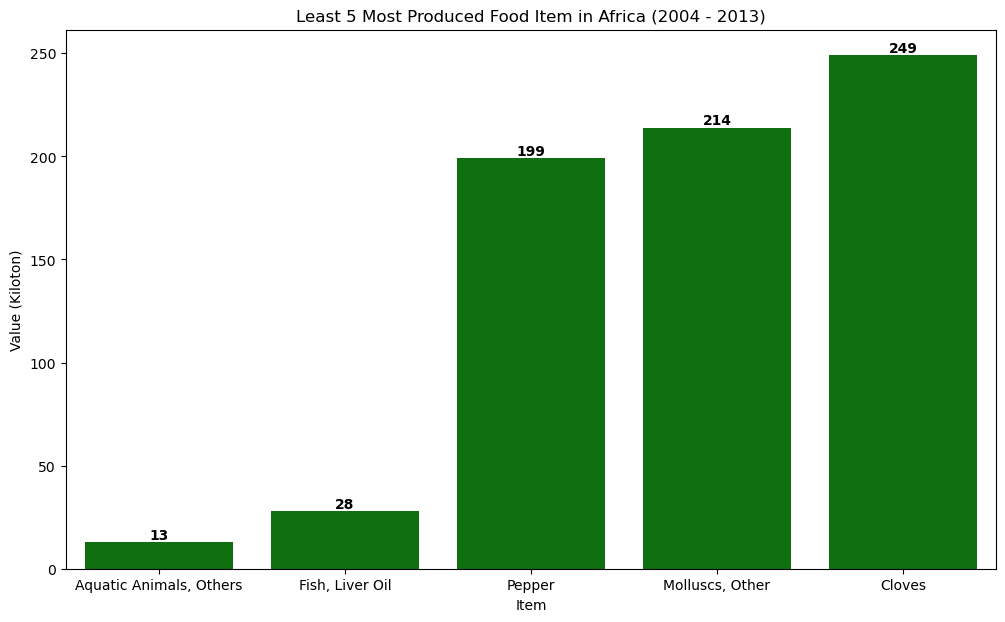

In [39]:
plt.figure(figsize=[12, 7])
mp_food = pd.DataFrame(af_prod.groupby('Item')['Value'].sum().sort_values(ascending=True)).reset_index()[:5]

ax = sns.barplot(y=mp_food.Value, x=mp_food.Item, data=mp_food, color='g')

for i, bar in enumerate(ax.patches):
    count = bar.get_height()

## Labeling each bar
    ax.annotate(f'{int(count)}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.gca().set_title("Least 5 Most Produced Food Item in Africa (2004 - 2013)")
plt.ylabel('Value (Kiloton)')
plt.xlabel('Item')


plt.show()

**Observation:**
**The Least 5 most produced food in Africa between 2004 and 2013 are Cloves, Molluscs,Pepper, Fish,Liver oil and Aquatic Animals.

### QUESTION 7. What are the most popular Food Items that the Top 3 producing Africa Countries Produced ?

In [40]:
#Let's put the spotlight on the Top 3 producing countries.
Top_1 =af_prod[af_prod['Country'] == 'Nigeria']
Top_2 =af_prod[af_prod['Country'] == 'Egypt']
Top_3 =af_prod[af_prod['Country'] == 'South Africa']

In [41]:
Top1_af_prod = Top_1.groupby(['Item'], as_index=False).Value.sum()
Top2_af_prod = Top_2.groupby(['Item'], as_index=False).Value.sum()
Top3_af_prod = Top_3.groupby(['Item'], as_index=False).Value.sum()


In [42]:
###Visualizing food items in Nigeria (Top 3 producing countries)
fig = px.bar(Top1_af_prod, 
             x ="Item", 
             y ="Value",
             color ='Value',
             hover_name ='Item',
             height=1000,
             title = 'Food Items Produced In Nigeria  (2004 - 2013)',
             labels = {'Year': 'Year', 'Value':'Value (kt)'})


fig.show()

**Observation**: Nigeria highest food produces are Cassava and its products & Yams. 

In [43]:
###Visualizing food items in Egypt (Top 3 producing countries)
plt.figure(figsize=[12,7])
fig = px.bar(Top2_af_prod, 
             x ="Item", 
             y ="Value",
             color ='Value',
             hover_name ='Item',
             height=1000,
             title = 'Food Items Produced In Egypt  (2004 - 2013)',
             labels = {'Year': 'Year', 'Value':'Value (kt)'})


fig.show()

<Figure size 1200x700 with 0 Axes>

**Observation**: Egypt highest food produces is SugarCane although there is a relatively fair spread in their food production including Products like Maize & Products, Tomatoes,Vegetables, Wheat, Milk(excluding butter)unlike Nigeria.

In [44]:
###Visualizing food items in South Africa(Top 3 producing countries)
plt.figure(figsize=[12,7])
fig = px.bar(Top3_af_prod, 
             x ="Item", 
             y ="Value",
             color ='Value',
             hover_name ='Item',
             height=1000,
             title = 'Food Items Produced In South Africa  (2004 - 2013)',
             labels = {'Year': 'Year', 'Value':'Value (kt)'})


fig.show()

<Figure size 1200x700 with 0 Axes>

**Observation**: South Africa highest food produces is SugarCane and Maize.

### QUESTION 8. Are there any outlier countries in the food production dataset between 2004 and 2013?

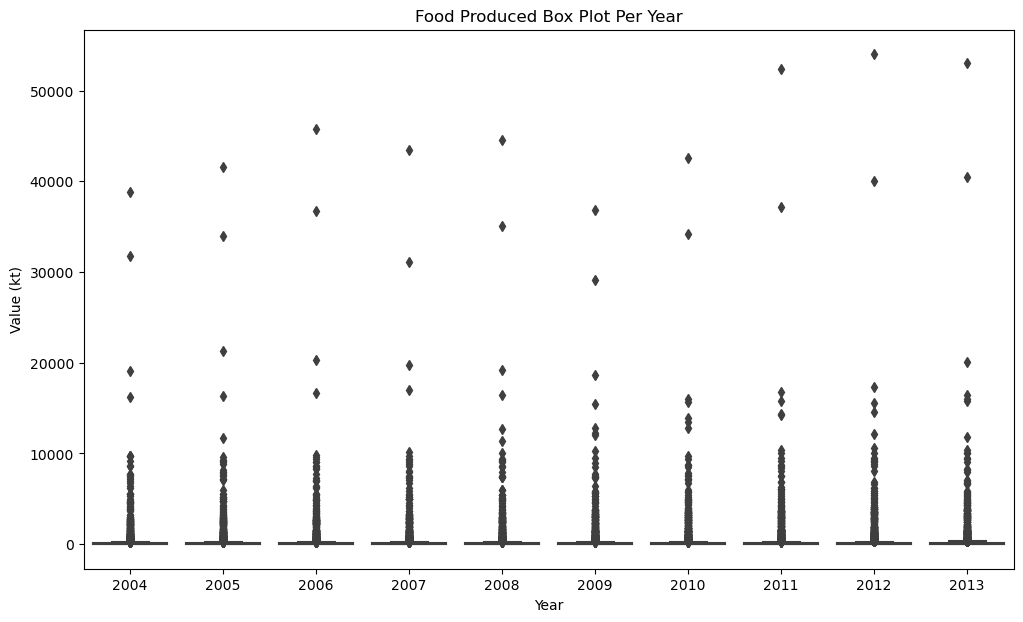

In [45]:
##Visualizing food supply data with seaborn boxplot
plt.figure(figsize=[12, 7])
base_color = sns.color_palette()[0]
sns.boxplot(data=af_prod, y='Value', x='Year', color=base_color)
plt.xlabel('Year')
plt.ylabel('Value (kt)')
plt.title('Food Produced Box Plot Per Year');

In [46]:
### Statistical plot showing means, quartiles, medians, etc.
af_prod.describe()

Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000

In [47]:
### Food Production interquatile range
af_prod_Q1=3.0
af_prod_Q3= 108.0
af_prod_IQR = af_prod_Q3 - af_prod_Q1
af_prod_IQR

105.0

In [48]:
### Upper fence value
af_prod_upper_fence = af_prod_Q3 + ( 1.5 * af_prod_IQR)
af_prod_upper_fence

265.5

In [49]:
### Lower fence value
af_prod_lower_fence = af_prod_Q1 + ( 1.5 * af_prod_IQR)
af_prod_lower_fence

160.5

### Finding out the outlier in food production -Any Country that has a value greater than the upper fence value is an outlier. 

In [50]:
### Finding the countries whose value is higher than the upper fence
af_prod[af_prod.Value > (af_prod_Q1 + ( 1.5 * af_prod_IQR))]

Country                     Item  Year  Value Unit
0       Algeria       Wheat and products  2004   2731   kt
1       Algeria       Wheat and products  2005   2415   kt
2       Algeria       Wheat and products  2006   2688   kt
3       Algeria       Wheat and products  2007   2319   kt
4       Algeria       Wheat and products  2008   1111   kt
...         ...                      ...   ...    ...  ...
23085  Zimbabwe  Milk - Excluding Butter  2009    389   kt
23086  Zimbabwe  Milk - Excluding Butter  2010    396   kt
23087  Zimbabwe  Milk - Excluding Butter  2011    400   kt
23088  Zimbabwe  Milk - Excluding Butter  2012    410   kt
23089  Zimbabwe  Milk - Excluding Butter  2013    410   kt

[4830 rows x 5 columns]

In [51]:
### Converting the outlier countries into a dataframe
out_countries = pd.DataFrame(af_prod[af_prod.Value > (af_prod_Q1 + ( 1.5 * af_prod_IQR))])

In [52]:
# checking the number of countries that are outliers
out_countries['Country'].nunique()

39

In [53]:
# checking the unique names of the outlier countries
out_countries['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Burkina Faso', 'Cameroon',
       'Central African Republic', 'Chad', 'Congo', "Cote d'Ivoire",
       'Egypt', 'Ethiopia', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Kenya', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa',
       'Sudan', 'Swaziland', 'Togo', 'Tunisia', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Zimbabwe'], dtype=object)

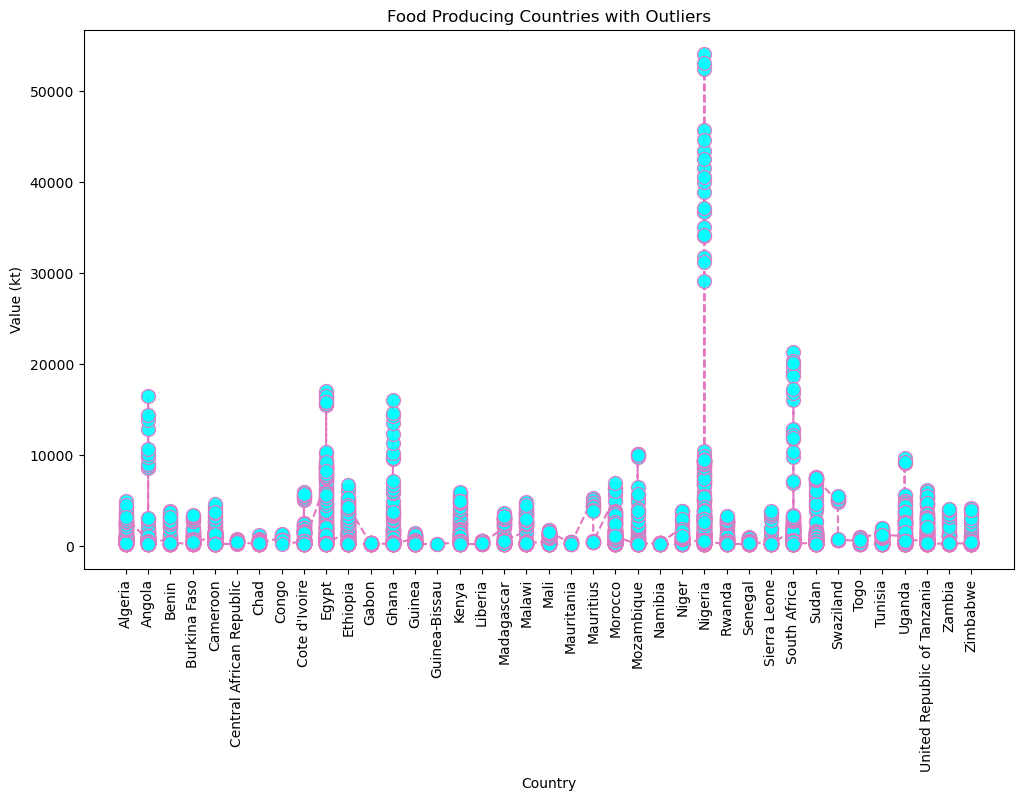

In [54]:
# Visualizing the country supply outlier with matplotlib (lineplot)
plt.figure(figsize=[12,7])
plt.plot(out_countries['Country'],out_countries['Value'],

    linewidth=1.5,
    linestyle='--',
    color= sns.color_palette()[6],
    marker='o',
    markersize=10,
    markerfacecolor=(0, 1, 1, 0.9))

plt.xticks(rotation=90)
plt.title('Food Producing Countries with Outliers')
plt.ylabel('Value (kt)')
plt.xlabel('Country');

**Observation:**39 countries in total produced consistently high amount of food between 2004 and 2013 and they are regarded as outlier countries. This Country include (Algeria, Angola, Benin, Burkina Faso, Cameroon, Central African Republic, Chad, Congo, Cote d'Ivoire, Egypt, Ethiopia, Gabon, Ghana, Guinea, Guinea-Bissau, Kenya, Liberia, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Swaziland, Togo, Tunisia, Uganda, United Republic of Tanzania, Zambia, and Zimbabwe).

### QUESTION 9. Are there any outlier countries in the food Supply dataset between 2004 and 2013?

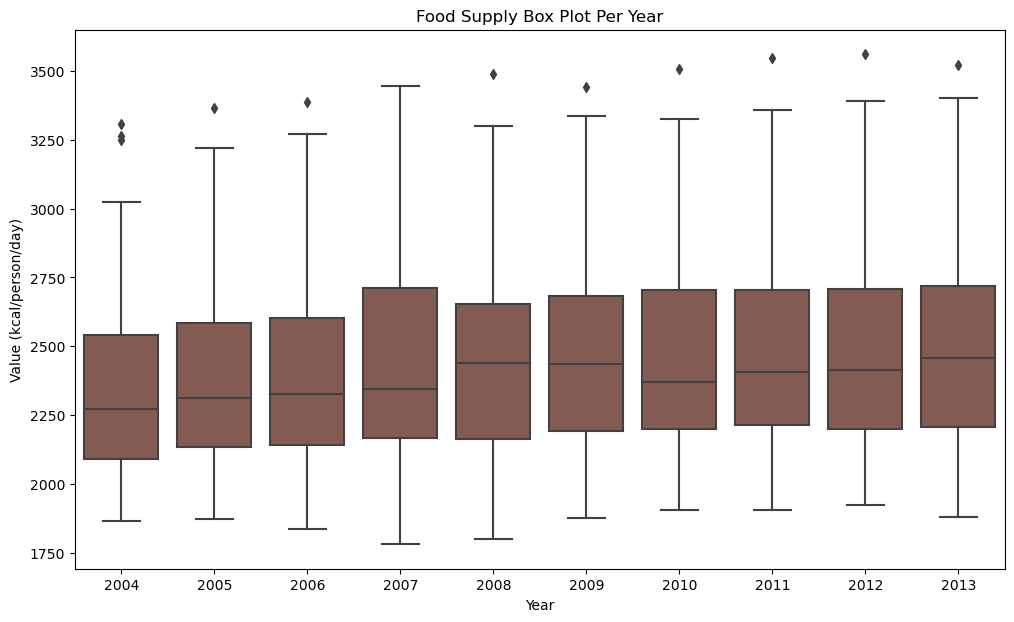

In [55]:
##Visualizing food supply data with seaborn boxplot
plt.figure(figsize=[12, 7])
base_color = sns.color_palette()[5]
sns.boxplot(data=af_supply, y='Value', x='Year', color=base_color)
plt.xlabel('Year')
plt.ylabel('Value (kcal/person/day)')
plt.title('Food Supply Box Plot Per Year');

**Observation**
It can be observed from the box plot that there exists a number of outliers in the food supply dataset for all the years from 2004-2013, with 2012 having the largest outlier. The dataset for the year 2012 will be explored to identify the country with the highest outliers.

In [56]:
#### Food supply data for 2012 only
af_supply_2012 = af_supply[af_supply['Year']==2012]
af_supply_2012

Country  Year  Value             Unit
8                        Algeria  2012   3272  kcal/person/day
18                        Angola  2012   2384  kcal/person/day
28                         Benin  2012   2610  kcal/person/day
38                      Botswana  2012   2342  kcal/person/day
48                  Burkina Faso  2012   2707  kcal/person/day
58                    Cabo Verde  2012   2590  kcal/person/day
68                      Cameroon  2012   2622  kcal/person/day
78      Central African Republic  2012   2116  kcal/person/day
88                          Chad  2012   2124  kcal/person/day
98                         Congo  2012   2158  kcal/person/day
108                Cote d'Ivoire  2012   2780  kcal/person/day
118                     Djibouti  2012   2545  kcal/person/day
128                        Egypt  2012   3561  kcal/person/day
138                     Ethiopia  2012   2124  kcal/person/day
148                        Gabon  2012   2795  kcal/person/day
158                       Gambia  2012   2652  kcal/person/day
168                        Ghana  2012   3043  kcal/person/day
178                       Guinea  2012   2561  kcal/person/day
188                Guinea-Bissau  2012   2331  kcal/person/day
198                        Kenya  2012   2192  kcal/person/day
208                      Lesotho  2012   2547  kcal/person/day
218                      Liberia  2012   2200  kcal/person/day
228                   Madagascar  2012   2058  kcal/person/day
238                       Malawi  2012   2333  kcal/person/day
248                         Mali  2012   2860  kcal/person/day
258                   Mauritania  2012   2873  kcal/person/day
268                    Mauritius  2012   3014  kcal/person/day
278                      Morocco  2012   3366  kcal/person/day
288                   Mozambique  2012   2298  kcal/person/day
298                      Namibia  2012   2145  kcal/person/day
308                        Niger  2012   2567  kcal/person/day
318                      Nigeria  2012   2665  kcal/person/day
328                       Rwanda  2012   2270  kcal/person/day
338        Sao Tome and Principe  2012   2338  kcal/person/day
348                      Senegal  2012   2443  kcal/person/day
358                 Sierra Leone  2012   2374  kcal/person/day
368                 South Africa  2012   3014  kcal/person/day
370                        Sudan  2012   2301  kcal/person/day
388                    Swaziland  2012   2293  kcal/person/day
398                         Togo  2012   2414  kcal/person/day
408                      Tunisia  2012   3390  kcal/person/day
418                       Uganda  2012   2160  kcal/person/day
428  United Republic of Tanzania  2012   2192  kcal/person/day
438                       Zambia  2012   1923  kcal/person/day
448                     Zimbabwe  2012   2197  kcal/person/day

In [57]:
#### Statistical description of 2012 data
af_supply.query('Year==2012')['Value'].describe()

count      45.000000
mean     2527.644444
std       388.466926
min      1923.000000
25%      2200.000000
50%      2414.000000
75%      2707.000000
max      3561.000000
Name: Value, dtype: float64

In [58]:
### Food Supply interquatile range
af_supply_Q1=2200.000000
af_supply_Q3=2707.000000
af_supply_IQR = af_supply_Q3 - af_supply_Q1
af_supply_IQR

507.0

In [59]:
### Upper fence value
af_supply_upper_fence = af_supply_Q3 + ( 1.5 * af_supply_IQR)
af_supply_upper_fence

3467.5

In [60]:
### Lower fence value
af_supply_lower_fence= af_supply_Q1 + ( 1.5 * af_supply_IQR)
af_supply_lower_fence

2960.5

### Finding out the outlier in food Suppy -Any Country that has a value greater than the upper fence value is an outlier. 

In [61]:
### Checking if the value of any country is lower than the lower fence value
af_supply_2012[af_supply.Value < (af_supply_Q1 - ( 1.5 * af_supply_IQR))].any()

Country    False
Year       False
Value      False
Unit       False
dtype: bool

In [62]:
### Checking if the value of any country is higher than the upper fence
af_supply_2012[af_supply.Value < (af_supply_Q1 + ( 1.5 * af_supply_IQR))].any()

Country    True
Year       True
Value      True
Unit       True
dtype: bool

In [63]:
### Finding the countries whose value is higher than the lower fence
af_supply_2012[af_supply.Value > (af_supply_Q1 + ( 1.5 * af_supply_IQR))]

Country  Year  Value             Unit
8         Algeria  2012   3272  kcal/person/day
128         Egypt  2012   3561  kcal/person/day
168         Ghana  2012   3043  kcal/person/day
268     Mauritius  2012   3014  kcal/person/day
278       Morocco  2012   3366  kcal/person/day
368  South Africa  2012   3014  kcal/person/day
408       Tunisia  2012   3390  kcal/person/day

In [64]:
### Checking if Egypt is the main outlier in the Supply dataset by year.
af_supply[af_supply.Value > (af_supply_Q3 + ( 1.5 * af_supply_IQR))]

Country  Year  Value             Unit
124   Egypt  2008   3490  kcal/person/day
126   Egypt  2010   3507  kcal/person/day
127   Egypt  2011   3549  kcal/person/day
128   Egypt  2012   3561  kcal/person/day
129   Egypt  2013   3522  kcal/person/day

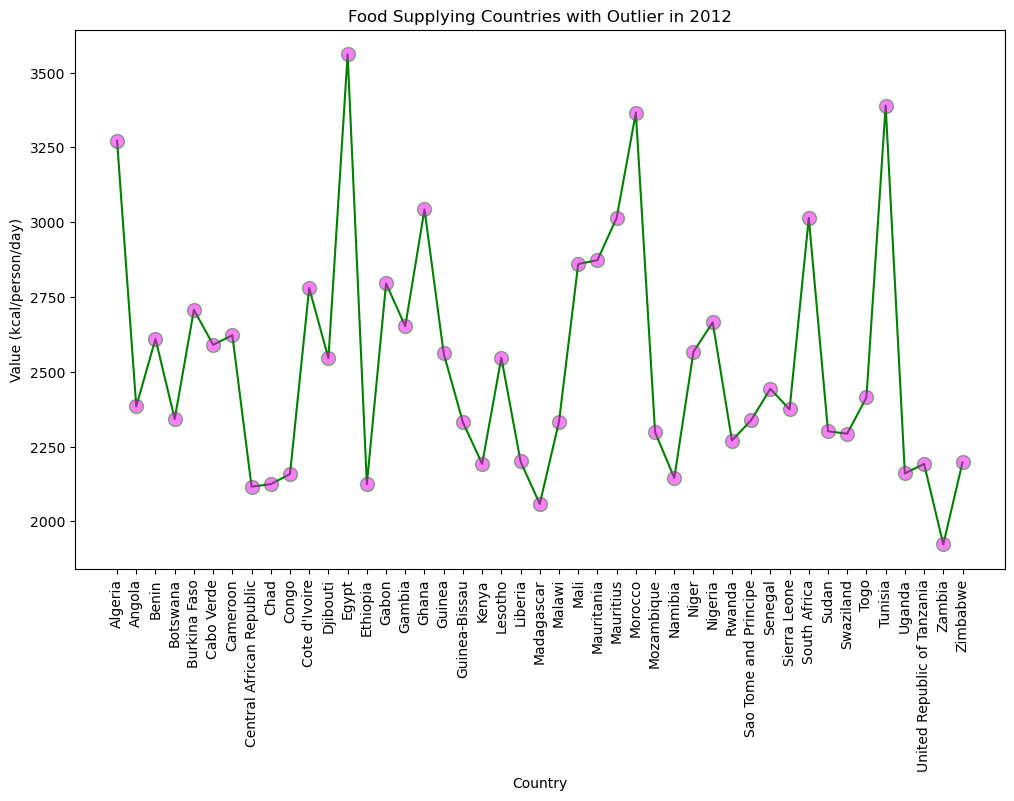

In [65]:
# Visualizing the country supply outlier with matplotlib (lineplot)
plt.figure(figsize=[12, 7])
plt.plot(af_supply_2012['Country'],af_supply_2012['Value'],
    linewidth=1.5,
    linestyle='-',
    color='g',
    marker='o',
    markersize=10,
    markerfacecolor=(1, 0, 1, 0.5))

plt.xticks(rotation=90)
plt.title('Food Supplying Countries with Outlier in 2012');
plt.ylabel('Value (kcal/person/day)')
plt.xlabel('Country');

**Observation**:Egypt is the African country with highest food supply outliers because the supply value is higher than the upper fence value.It is also evident from the Visualization that Egypt has a substantially bigger food supply accessible for consumption in 2012 compared to other African countries.

### QUESTION 10. Is there any relationship between Average Food Production and Food Supply per year? 

In [66]:
##Remaining the production and supply dataframe
df1=af_prod
df2=af_supply

In [67]:
# The mean values of Food Production per Year
df1_mean = df1.groupby('Year', as_index=False).Value.mean()
df1_mean

Year       Value
0  2004  286.767301
1  2005  298.986592
2  2006  310.814014
3  2007  305.215830
4  2008  318.686851
5  2009  323.040657
6  2010  340.166955
7  2011  351.303633
8  2012  364.831816
9  2013  378.227568

In [68]:
#The mean values of Food Supplied per Year
df2_mean = df2.groupby('Year', as_index=False).Value.mean()
df2_mean

Year        Value
0  2004  2394.222222
1  2005  2409.288889
2  2006  2430.800000
3  2007  2447.755556
4  2008  2460.755556
5  2009  2482.222222
6  2010  2497.400000
7  2011  2515.422222
8  2012  2527.644444
9  2013  2532.244444

In [109]:
### Visualizing Average food produced and supplied between 2004-2013
plt.figure(figsize=[12, 7])
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

fig.add_trace(go.Scatter(x=df1_mean['Year'], y=df1_mean['Value'], name='Average Food Production'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=df2_mean['Year'], y=df2_mean['Value'], name='Average Food Supply'),
              row=1, col=1)

fig.update_layout(height=800, width=1000, title_text="Average Food Production & Supply between 2004-2013");

fig.show()

<Figure size 1200x700 with 0 Axes>

**Observation** 
In 2007, the average food production dropped to 305.2158kt and the average food supplied was 2447.75kcal/person/day this means that more food was supplied to meet the need of the population.This situation highlights the fact that food production alone does not determine the availability of food for a population.There is a need for African Countries to improve their food productions capacities and reduce dependence on external sources of food.

 ### QUESTION 11. Which African countries belong to the Top 5 OATS Producers?

In [70]:
###Selecting Oats production data
Oats_df = df1[df1.Item == 'Oats']
Oats_df

Country  Item  Year  Value Unit
40      Algeria  Oats  2004     89   kt
41      Algeria  Oats  2005     78   kt
42      Algeria  Oats  2006     89   kt
43      Algeria  Oats  2007     92   kt
44      Algeria  Oats  2008     27   kt
...         ...   ...   ...    ...  ...
22515  Zimbabwe  Oats  2009      1   kt
22516  Zimbabwe  Oats  2010      1   kt
22517  Zimbabwe  Oats  2011      1   kt
22518  Zimbabwe  Oats  2012      1   kt
22519  Zimbabwe  Oats  2013      1   kt

[90 rows x 5 columns]

In [71]:
### Statistics showing the top 5 countries that produced Cassava
Oats_df.groupby(['Country'])['Value'].sum().sort_values(ascending=False).reset_index()[:5]

Country  Value
0       Algeria    849
1      Ethiopia    443
2  South Africa    406
3       Morocco    332
4         Kenya     37

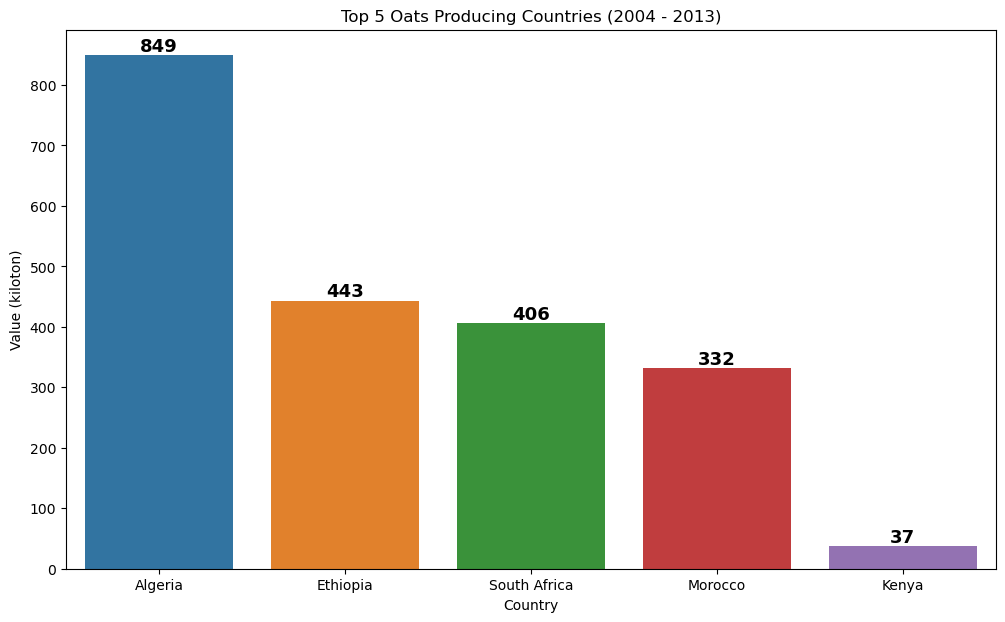

In [72]:
###Visualing the Top 5 Oats Producing Countries (2004-2013)
Oats_producer = pd.DataFrame(Oats_df.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()[:5]
plt.figure(figsize=[12, 7])
ax = sns.barplot(y=Oats_producer.Value, x=Oats_producer.Country, data=Oats_df, color=None)
ax.set_title("Top 5 Oats Producing Countries (2004 - 2013)")
plt.xlabel('Country')
plt.ylabel('Value (kiloton)')

for i, bar in enumerate(ax.patches):
    count = bar.get_height()
    ax.annotate(f'{int(count)}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=13, color='black', fontweight='bold')

plt.show()

**Observation*:The Top 5 Cassava Producing Countries that has the highest total quantity of Oats from 2004 to 2013 are: Algeria, Ethiopia, South Africa, Morrocco, and Kenya. However, Algeria is the top leading producer of Oat products.

### QUESTION 12. Which African countries belong to the Top 5 Cassava Producers?

In [73]:
# Selecting Cassava production data
Cas_df = df1[df1.Item == 'Cassava and products']
Cas_df

Country                  Item  Year  Value Unit
630      Angola  Cassava and products  2004   8587   kt
631      Angola  Cassava and products  2005   8806   kt
632      Angola  Cassava and products  2006   9037   kt
633      Angola  Cassava and products  2007   9730   kt
634      Angola  Cassava and products  2008  10057   kt
...         ...                   ...   ...    ...  ...
22555  Zimbabwe  Cassava and products  2009    216   kt
22556  Zimbabwe  Cassava and products  2010    204   kt
22557  Zimbabwe  Cassava and products  2011    225   kt
22558  Zimbabwe  Cassava and products  2012    228   kt
22559  Zimbabwe  Cassava and products  2013    230   kt

[330 rows x 5 columns]

In [74]:
### Statistics showing the top 5 countries that produced Cassava
Cas_df.groupby(['Country'])['Value'].sum().sort_values(ascending=False).reset_index()[:5]

Country   Value
0                      Nigeria  452881
1                        Ghana  121026
2                       Angola  114286
3                   Mozambique   71243
4  United Republic of Tanzania   52057

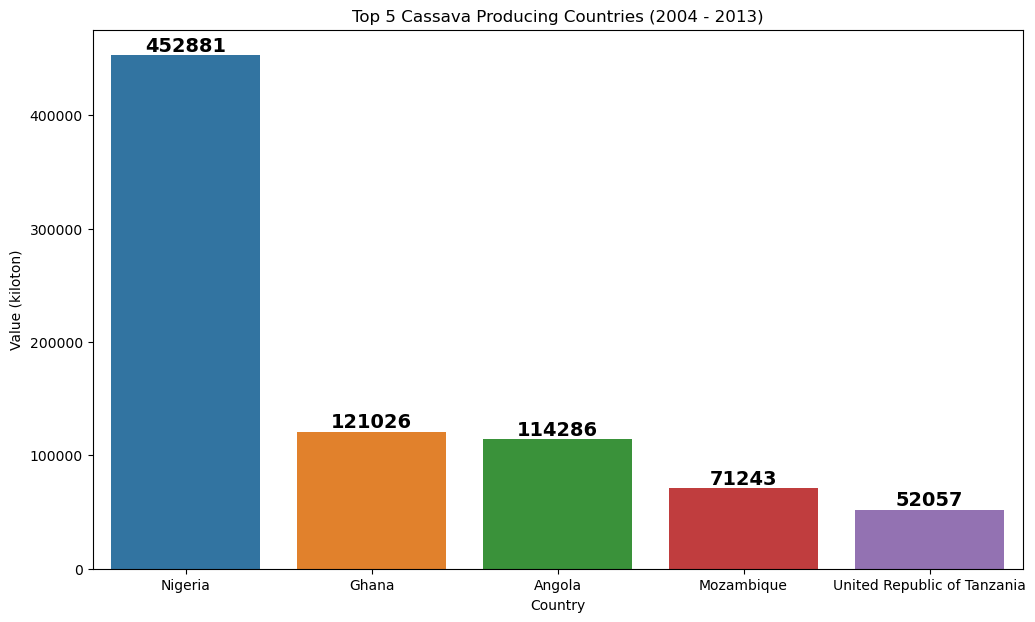

In [75]:
###Visualing the Top 5 Cassava Producing Countries 
Cass_producer = pd.DataFrame(Cas_df.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()[:5]

plt.figure(figsize=[12, 7])
ax = sns.barplot(y=Cass_producer.Value, x=Cass_producer.Country, data=Cas_df, color=None)
ax.set_title("Top 5 Cassava Producing Countries (2004 - 2013)")
plt.xlabel('Country')
plt.ylabel('Value (kiloton)')


for i, bar in enumerate(ax.patches):
    count = bar.get_height()
    ax.annotate(f'{int(count)}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=14, color='black', fontweight='bold')

plt.show()


**Observation*:The Top 5 Cassava Producing Countries that has the highest total quantity of Cassava from 2004 to 2013 are: Nigeria,Ghana, Angola,Mozambique and United Republic of Tanzania.However, Nigeria is the top leading producer of Cassava.

### QUESTION 13. Which African Countries belong to the Top 5 Beverage Producers?

In [76]:
# Selecting Beverage production data
Bev_df = df1[df1.Item == 'Beverages, Fermented']
Bev_df

Country                  Item  Year  Value Unit
930      Angola  Beverages, Fermented  2004     95   kt
931      Angola  Beverages, Fermented  2005     99   kt
932      Angola  Beverages, Fermented  2006    119   kt
933      Angola  Beverages, Fermented  2007    131   kt
934      Angola  Beverages, Fermented  2008    190   kt
...         ...                   ...   ...    ...  ...
22955  Zimbabwe  Beverages, Fermented  2009    125   kt
22956  Zimbabwe  Beverages, Fermented  2010    128   kt
22957  Zimbabwe  Beverages, Fermented  2011    133   kt
22958  Zimbabwe  Beverages, Fermented  2012    139   kt
22959  Zimbabwe  Beverages, Fermented  2013    144   kt

[300 rows x 5 columns]

In [77]:
### Statistics showing the top 5 countries that produced Beverages
Bev_df.groupby(['Country'])['Value'].sum().sort_values(ascending=False).reset_index()[:5]

Country  Value
0                      Nigeria  93839
1                 Burkina Faso  30404
2                       Uganda  29559
3  United Republic of Tanzania  25285
4                     Cameroon   9829

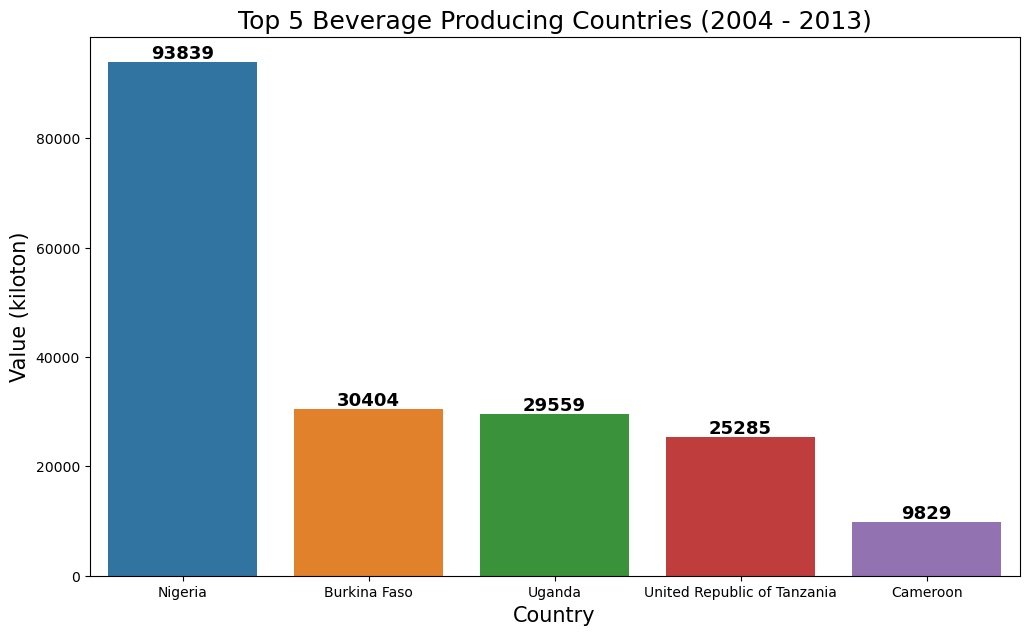

In [78]:
###Visualing the Top 5 Beverage Producing Countries 
bev_producer = pd.DataFrame(Bev_df.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()[:5]
plt.figure(figsize=[12, 7])
ax = sns.barplot(y=bev_producer.Value, x=bev_producer.Country, data=Bev_df, color=None)
ax.set_title("Top 5 Beverage Producing Countries (2004 - 2013)", size=18)
plt.xlabel('Country', size=15)
plt.ylabel('Value (kiloton)', size=15)


for i, bar in enumerate(ax.patches):
    count = bar.get_height()
    ax.annotate(f'{int(count)}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=13, color='black', fontweight='bold')

plt.show()

**Observation*:The Top 5 Producing Countries that has the highest total quantity of Beverage from 2004 to 2013 are: Nigeria, Burkina Faso, Uganda, United Republic of Tanzania, and Cameroon. However, Nigeria is the top leading producer of beverage.

### QUESTION 14. Which African Countries belong to the Top 5 Rice Producers?

In [79]:
# Selecting Rice production data
Rice_df = df1[df1.Item =='Rice (Milled Equivalent)']
Rice_df

Country                      Item  Year  Value Unit
10      Algeria  Rice (Milled Equivalent)  2004      0   kt
11      Algeria  Rice (Milled Equivalent)  2005      0   kt
12      Algeria  Rice (Milled Equivalent)  2006      0   kt
13      Algeria  Rice (Milled Equivalent)  2007      0   kt
14      Algeria  Rice (Milled Equivalent)  2008      0   kt
...         ...                       ...   ...    ...  ...
22485  Zimbabwe  Rice (Milled Equivalent)  2009      0   kt
22486  Zimbabwe  Rice (Milled Equivalent)  2010      0   kt
22487  Zimbabwe  Rice (Milled Equivalent)  2011      0   kt
22488  Zimbabwe  Rice (Milled Equivalent)  2012      0   kt
22489  Zimbabwe  Rice (Milled Equivalent)  2013      0   kt

[380 rows x 5 columns]

In [80]:
### Statistics showing the top 5 countries that produced Beverages
Rice_df.groupby(['Country'])['Value'].sum().sort_values(ascending=False).reset_index()[:5]

Country  Value
0                        Egypt  40370
1                      Nigeria  26964
2                   Madagascar  26118
3  United Republic of Tanzania  10956
4                       Guinea  10400

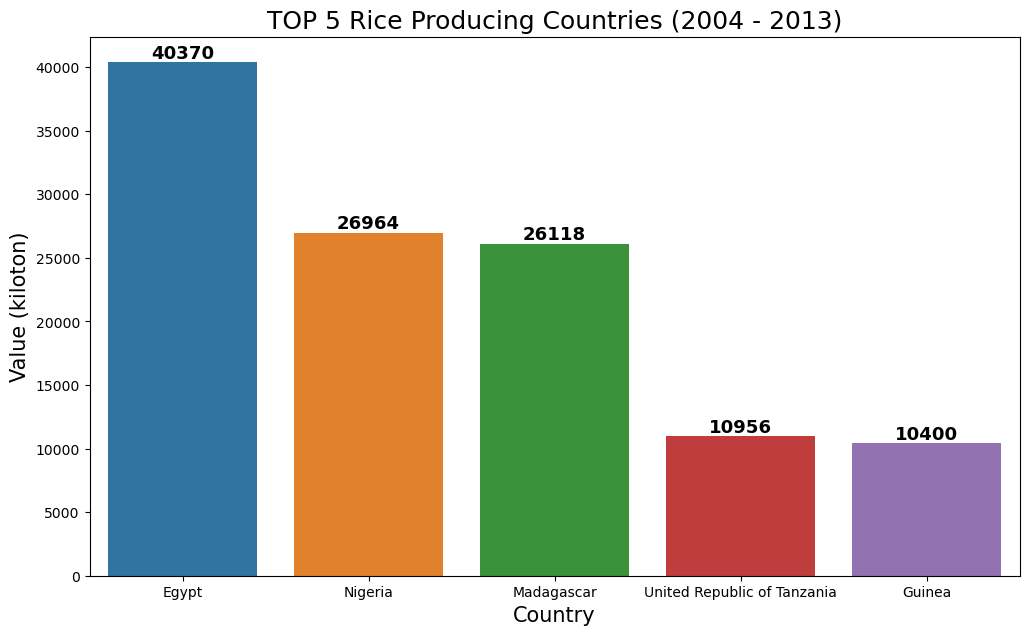

In [81]:
###Visualing the Top 5 Beverage Producing Countries 
Rice_producer = pd.DataFrame(Rice_df.groupby(['Country'])['Value'].sum().sort_values(ascending=False)).reset_index()[:5]
plt.figure(figsize=[12, 7])
ax = sns.barplot(y=Rice_producer.Value, x=Rice_producer.Country, data=Rice_df, color=None)
ax.set_title("TOP 5 Rice Producing Countries (2004 - 2013)", size=18)
plt.xlabel('Country', size=15)
plt.ylabel('Value (kiloton)', size=15)


for i, bar in enumerate(ax.patches):
    count = bar.get_height()
    ax.annotate(f'{int(count)}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom', fontsize=13, color='black', fontweight='bold')

plt.show()

In [82]:
### Visualizing top 5 African Producers of Rice (Milled Equivalent using a Map)
data = dict(
    type='choropleth',
    colorscale='viridis',
    locations=Rice_df['Country'],
    locationmode="country names",
    z=Rice_df['Value'],
    text=Rice_df['Country'],
    colorbar={'title': 'Rice Produced in Kiloton'},
)

layout = dict(
    title='Rice Produced in Africa (2004-2013)',
    geo=dict(
        scope='africa',
        showframe=False,
        projection={'type': 'mercator'}
    )
)

choromap = go.Figure(data=[data], layout=layout)

# Save the HTML file
pyo.plot(choromap, filename='rice_production_map.html')

'rice_production_map.html'

**Observation** The Top 5 countries that have produced the highest total quantity of rice from 2004 to 2013 are:Egypt, Nigeria,Madagascar, United Republic of Tanzania and Guinea.However, Egypt is the top leading producer of Rice.
This is a link to the interactive map- file:///C:/Users/aroko/rice_production_map.html. that shows the Top 5 Rice Producing Countries.

### TEST OF HYPOTHESIS
Population growth may have an impact on Africa's high food production between 2004 and 2013.According to the FAO, rice was the third most produced food in the world in 2014.Rice (Milled Equivalent), a staple meal in most of the African Countries, may be used in hypothesis testing to gauge this.

The World Bank population dataset, the Country Code dataset, and the Rice (Milled Equivalent) production dataset for African Countries from 2004 to 2013 will be combined to provide test data for hypothesis measurement.

To analyze the linear relationship between our variables, X and Y, I will utilize the Pearson Correlation Coefficient.
X: The Annual Volume of rice produced in African Countries
Y: The Average annual population of African Countries.

The hypothesis test statements:  H0 <= 0(NULL HYPOTHESIS), H1 > 0(ALTERNATIVE HYPOTHESIS)

NULL HYPOTHESIS: No significant correlation between population average in African countries and rice production in a specific year. i.e.  no relationship between the two variables.

ALTERNATIVE HYPOTHESIS: African countries population and rice production are significantly correlated. i.e there is a relationship between the two variables.


###  QUESTION 15:Is there a relationship between Africa's population and the total amount of rice produced in African countries?

In [83]:
# Importing the Country Code dataset 

country_codes = pd.read_csv('2014 World_ GDP_with_Country_Codes.csv')
country_codes.head()

COUNTRY  GDP (BILLIONS) CODE
0     Afghanistan           21.71  AFG
1         Albania           13.40  ALB
2         Algeria          227.80  DZA
3  American Samoa            0.75  ASM
4         Andorra            4.80  AND

In [84]:
# Dropping and renaming columns in the country code dataset to fit the column names in the food production dataset
country_codes.rename(columns ={'COUNTRY':'Country','CODE':'Country Code'},inplace=True)

In [85]:
### Drop unwanted column 
country_codes.drop('GDP (BILLIONS)', axis=1, inplace=True)
country_codes.head()

Country Country Code
0     Afghanistan          AFG
1         Albania          ALB
2         Algeria          DZA
3  American Samoa          ASM
4         Andorra          AND

In [86]:
# Merging the country code dataset with the food production dataset

df1_codes = pd.merge(df1, country_codes, on ='Country', how = 'inner')
df1_codes.head()

Country                Item  Year  Value Unit Country Code
0  Algeria  Wheat and products  2004   2731   kt          DZA
1  Algeria  Wheat and products  2005   2415   kt          DZA
2  Algeria  Wheat and products  2006   2688   kt          DZA
3  Algeria  Wheat and products  2007   2319   kt          DZA
4  Algeria  Wheat and products  2008   1111   kt          DZA

In [87]:
# Merging the country code dataset with the food supply dataset
supp_code = pd.merge(df2, country_codes, on ='Country', how = 'inner')
supp_code 

Country  Year  Value             Unit Country Code
0     Algeria  2004   2987  kcal/person/day          DZA
1     Algeria  2005   2958  kcal/person/day          DZA
2     Algeria  2006   3047  kcal/person/day          DZA
3     Algeria  2007   3041  kcal/person/day          DZA
4     Algeria  2008   3048  kcal/person/day          DZA
..        ...   ...    ...              ...          ...
415  Zimbabwe  2009   2147  kcal/person/day          ZWE
416  Zimbabwe  2010   2168  kcal/person/day          ZWE
417  Zimbabwe  2011   2200  kcal/person/day          ZWE
418  Zimbabwe  2012   2197  kcal/person/day          ZWE
419  Zimbabwe  2013   2110  kcal/person/day          ZWE

[420 rows x 5 columns]

In [88]:
# Importing the population dataset

pop_df = pd.read_csv("population data(1960-2019).csv")
pop_df


Country Name  Year     Count
0             Aruba  1960     54211
1       Afghanistan  1960   8996973
2            Angola  1960   5454933
3           Albania  1960   1608800
4           Andorra  1960     13411
...             ...   ...       ...
12590        Kosovo  2017   1830700
12591   Yemen, Rep.  2017  27834821
12592  South Africa  2017  57000451
12593        Zambia  2017  16853688
12594      Zimbabwe  2017  14236745

[12595 rows x 3 columns]

In [89]:
# Renaming the country column in the population data
pop_df.rename(columns = {"Country Name":"Country", "Count": "Population"}, inplace=True)
pop_df

Country  Year  Population
0             Aruba  1960       54211
1       Afghanistan  1960     8996973
2            Angola  1960     5454933
3           Albania  1960     1608800
4           Andorra  1960       13411
...             ...   ...         ...
12590        Kosovo  2017     1830700
12591   Yemen, Rep.  2017    27834821
12592  South Africa  2017    57000451
12593        Zambia  2017    16853688
12594      Zimbabwe  2017    14236745

[12595 rows x 3 columns]

In [90]:
country_codes.head()

Country Country Code
0     Afghanistan          AFG
1         Albania          ALB
2         Algeria          DZA
3  American Samoa          ASM
4         Andorra          AND

In [91]:
# Merging population dataset with the country code dataset
pop_df_code = pd.merge(pop_df, country_codes, on ='Country', how = 'inner')

In [92]:
pop_df_code['Country'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Curacao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Faroe Islands', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'Gambia, The',
       'Guinea-Bissau', 'E

In [93]:
pop_df_code['Country'].nunique()

187

In [94]:
# Creating a list to hold the 187 African countries in the production and supply dataset
af_pop_country_list = pop_df_code['Country'].unique()
af_pop_country_list

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Curacao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Faroe Islands', 'Gabon', 'United Kingdom',
       'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'Gambia, The',
       'Guinea-Bissau', 'E

In [95]:
##  Checking the names of the African Countries from the food_production dataset
df1['Country'].unique()

array(['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe'], dtype=object)

In [96]:
df1['Country'].nunique()

45

In [97]:
# Creating a list to hold the 45 African countries in the production and supply dataset
af_prod_country_list =['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Congo', "Cote d'Ivoire", 'Djibouti', 'Egypt', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger',
       'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Togo',
       'Tunisia', 'Uganda', 'United Republic of Tanzania', 'Zambia',
       'Zimbabwe']

The population dataset has 187 countries and the african_production and african supply datasets has 45 countries each.

In [98]:
##Dropping the population country data
pop_df_code.drop("Country", axis = 1, inplace = True)
pop_df_code 

Year  Population Country Code
0      1960       54211          ABW
1      1961       55438          ABW
2      1962       56225          ABW
3      1963       56695          ABW
4      1964       57032          ABW
...     ...         ...          ...
10802  2013     7164132          SRB
10803  2014     7130576          SRB
10804  2015     7095383          SRB
10805  2016     7058322          SRB
10806  2017     7020858          SRB

[10807 rows x 3 columns]

In [99]:
###Checking the population Year datatype
pop_df_code.dtypes

Year             int64
Population       int64
Country Code    object
dtype: object

In [100]:
# Extracting rice production data in African countries over the years
Rice_df = df1.query("Item == 'Rice (Milled Equivalent)'")
Rice_total = pd.DataFrame(Rice_df.groupby(['Country', 'Year'], as_index = False)['Value'].sum())
Rice_total

Country  Year  Value
0     Algeria  2004      0
1     Algeria  2005      0
2     Algeria  2006      0
3     Algeria  2007      0
4     Algeria  2008      0
..        ...   ...    ...
375  Zimbabwe  2009      0
376  Zimbabwe  2010      0
377  Zimbabwe  2011      0
378  Zimbabwe  2012      0
379  Zimbabwe  2013      0

[380 rows x 3 columns]

In [101]:
# Merging the rice dataset with the country code dataset
rice_df = pd.merge(Rice_total, country_codes, on ='Country', how = 'inner')

# Renaming the Value column in the rice production data
rice_df.rename(columns = {"Value":"Rice Production (Kilotonnes)"}, inplace=True)
rice_df.head(4)

Country  Year  Rice Production (Kilotonnes) Country Code
0  Algeria  2004                             0          DZA
1  Algeria  2005                             0          DZA
2  Algeria  2006                             0          DZA
3  Algeria  2007                             0          DZA

In [102]:
#Merging the population and rice production dataset using the country code and year
Rice_Pop_df = pd.merge(rice_df, pop_df_code, on= [ "Year"], how = "inner")
Rice_Pop_df.head()

Country  Year  Rice Production (Kilotonnes) Country Code_x  Population  \
0  Algeria  2004                             0            DZA       98737   
1  Algeria  2004                             0            DZA    24726684   
2  Algeria  2004                             0            DZA    18758145   
3  Algeria  2004                             0            DZA     3026939   
4  Algeria  2004                             0            DZA       76244   

  Country Code_y  
0            ABW  
1            AFG  
2            AGO  
3            ALB  
4            AND

In [103]:
##Dropping the country code
Rice_Pop_df.drop("Country Code_x", axis = 1, inplace = True)
Rice_Pop_df.drop("Country Code_y", axis = 1, inplace = True)
Rice_Pop_df.head()

Country  Year  Rice Production (Kilotonnes)  Population
0  Algeria  2004                             0       98737
1  Algeria  2004                             0    24726684
2  Algeria  2004                             0    18758145
3  Algeria  2004                             0     3026939
4  Algeria  2004                             0       76244

In [104]:
# Computing the average rice production and popopulation per year
Rice_production_df = pd.DataFrame(Rice_Pop_df.groupby("Year", as_index=False).mean())
Rice_production_df 

Year  Rice Production (Kilotonnes)    Population
0  2004                    333.971429  3.129071e+07
1  2005                    356.028571  3.168758e+07
2  2006                    387.885714  3.208640e+07
3  2007                    366.657143  3.248575e+07
4  2008                    428.457143  3.288969e+07
5  2009                    413.657143  3.329366e+07
6  2010                    444.057143  3.369604e+07
7  2011                    449.228571  3.409119e+07
8  2012                    488.371429  3.466432e+07
9  2013                    488.371429  3.507703e+07

In [105]:
# Performing the Pearson Correlation hypothesis to measure the correlation between the average rice production and population
from scipy.stats import pearsonr
x = np.array(Rice_production_df['Rice Production (Kilotonnes)'])
y = np.array(Rice_production_df['Population'])

pearsonr(x, y)

PearsonRResult(statistic=0.9694043205583609, pvalue=3.694735823540323e-06)

In [106]:
##To Calculate the pearson corelation
import numpy
numpy.corrcoef(y, x)[0, 1]

0.9694043205583608

In [107]:
pd.DataFrame(pearsonr(y,x),index= (['statistic', 'p value']),columns=['pearson correlation'])

pearson correlation
statistic             0.969404
p value               0.000004

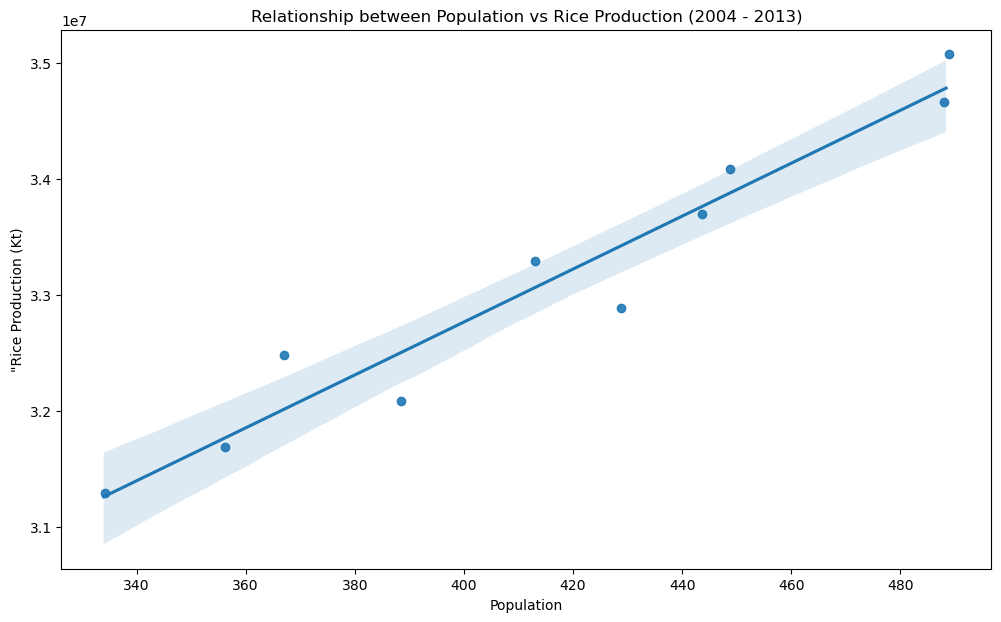

In [108]:
# let's visualize the correlation result with a scatter plot
plt.figure(figsize=[12, 7])
sns.regplot(data=Rice_production_df, x = "Rice Production (Kilotonnes)", y = "Population",  x_jitter=0.7, fit_reg=True, 
            scatter_kws={'alpha':0.9})

plt.title('Relationship between Population vs Rice Production (2004 - 2013)')
plt.ylabel('"Rice Production (Kt)')
plt.xlabel('Population');

**Observation**
>**The correlation hypothesis shows a significant positive relationship between rice production and African countries population during a specific year, the small p value shows that the null hypothesis (H0) is rejected at the 5% level.**

>**The correlation coefficient "0.97" shows a strong relationship between average rice production each year and average African population size in the same year.**

>**However, despite a significant relationship between population and rice production, this does not necessarily imply that rice production is what causes population growth.**


### INSIGHTS FROM THE ANALYSIS 

**1.Food production in Africa increases yearly. However, apart from the drop in 2007, there was a progress increase in food production from 2008 to 2013.**

**2.There is a progressive increase in food supply in African countries from 2004 to 2013.**

**3.The TOP 3 African countries with the highest volume of food production within (2004-2013) are Nigeria, Egypt, & South Africa. However, the BOTTOM 3 African countries Cabo Verde, Sao Tome & Principe and Djibouti produced the least volume of food.**

**4.The TOP 3 African countries with the highest volume of food supply within (2004-2013) are Egypt, Tunisia, & Morocco. However, the BOTTOM 3 African countries Chad, Ethiopia and Zambia supplied the least volume of food..**

**5.The Top 5 most produced food in Africa between 2004 and 2013 are Cassava, Sugar Cane, Maize and products, Yam, and Vegetables.**

**6.The Least 5 most produced food in Africa between 2004 and 2013 are Cloves, Molluscs,Pepper, Fish,Liver oil and Aquatic Animals.**

**7.Among the Top 3 African producing countries:**
>**Nigeria highest food produces are Cassava and its products & Yams.The reason for this high production in these two categories could be attributed to the ease of cultivating and producing these crops in Nigeria.The combination of favorable climatic conditions, cultural preferences, and relatively straightforward cultivation methods contributes to Nigeria's high production of Cassava and Yams.**

>**Egypt highest food produces is Sugarcane although there is a relatively fair spread in their food production including Products like Maize & Products, Tomatoes, Vegetables, Wheat, Milk (excluding butter) unlike Nigeria.**

>**South Africa highest food produces is SugarCane and Maize.**

**8.39 countries in total produced consistently high amount of food between 2004 and 2013 and they are regarded as outlier countries. This Country include (Algeria, Angola, Benin, Burkina Faso, Cameroon, Central African Republic, Chad, Congo, Cote d'Ivoire, Egypt, Ethiopia, Gabon, Ghana, Guinea, Guinea-Bissau, Kenya, Liberia, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Swaziland, Togo, Tunisia, Uganda, United Republic of Tanzania, Zambia, and Zimbabwe).**

**9.Egypt is the African country with highest food supply outliers because the supply value is higher than the upper fence value. It is also evident from the Visualization that Egypt has a substantially bigger food supply accessible for consumption in 2012 compared to other African countriess.**

**10.In 2007, the average food production dropped to 305.2158kt and the average food supplied was 2447.75kcal/person/day this means that more food was supplied to meet the need of the population. This situation highlights the fact that food production alone does not determine the availability of food for a population. There is a need for African Countries to improve their food productions capacities and reduce dependence on external sources of food.**

**11.The Top 5 Cassava Producing Countries that has the highest total quantity of Oats from 2004 to 2013 are: Algeria, Ethiopia, South Africa, Morrocco, and Kenya. However, Algeria is the top leading producer of Oat products.**

**12.The Top 5 Cassava Producing Countries that has the highest total quantity of Cassava from 2004 to 2013 are: Nigeria, Ghana, Angola, Mozambique, and United Republic of Tanzania. However, Nigeria is the top leading producer of Cassava.**

**13.The Top 5 Producing Countries that has the highest total quantity of Beverage from 2004 to 2013 are: Nigeria, Burkina Faso, Uganda, United Republic of Tanzania, and Cameroon. However, Nigeria is the top leading producer of beverage.**

**14.The Top 5 countries that have produced the highest total quantity of rice from 2004 to 2013 are: Egypt, Nigeria, Madagascar, United Republic of Tanzania, and Guinea. However, Egypt is the top leading producer of Rice.**

**15.The correlation hypothesis shows a significant positive relationship between rice production and African countries population during a specific year, the small p value shows that the null hypothesis (H0) is rejected at the 5% level. 
The correlation coefficient "0.97" shows a strong relationship between average rice production each year and average African population size in the same year. 
However, despite a significant relationship between population and rice production, correlation doesn't imply causation. This does not necessarily imply that rice production is what causes population growth.**



## Conclusion:
>**According to the Hypothesis testing, there was a bit significant relationship between population, food supply, and production in Africa between 2004 and 2013. Between 2004 and 2013, African countries experienced a potential food shortage due to a low food supply compared to increased production of food and population.**

>**However, the population doesn't seem to explain the possible cause of the food shortage in Africa during this time other elements like price inflation, exports, and inadequate storage facilities may be reasons for the shortage because countries with high food production have smaller food supply compared to their production.**

>**African countries must embark on a more deliberate transition from subsistence to commercial agriculture, this will enhance both the food supply and the countries total GDP. It will also help Africa country decrease or eradicate global hunger.**